# PCA
Code based on http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html but slightly changed

## Basic Overview

Due to the enormous amounts of data gathered nowadays it is common sense to try to find patterns in data and to detect correlation between them with the aim to reduce dimensionality while rataining most of the information.
The PCA aims at reducing the dimensions of a d-dimensional dataset by projecting it into a k-dimensional subspace where k<d. The main question is which subspace k represents the data well.

## Steps
The basic steps that have to be taken are:
- Standardize the data
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform             Singular Value Decomposition.
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest               eigenvalues where k is the number of dimensions of the new feature subspace (k≤d).
- Construct the projection matrix W from the selected k eigenvectors.
- Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

## Scikitlearn

All the above steps can be easily implemented by the scikitlearn implementation of the principal component analysis. 
The following code shows the implementation of the PCA on the iris dataset.

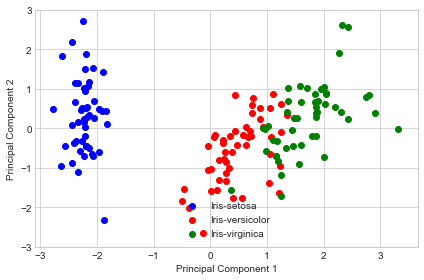

In [14]:
import pandas as pd

# import the iris dataset as dataframe
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()


# select the feature and target variables
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# scale the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


# import the PCA from sklearn
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib import pyplot as plt

# here the PCA is fit with 2 components
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()